# W261 HW6

## HW6.0. 

In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

Mathematical optimization is the selection of a best element (with regard to some criteria) from some set of available alternatives. In the simplest case, an optimization problem consists of maximizing or minimizing a real function by systematically choosing input values from within an allowed set and computing the value of the function. 

**Example?**

## HW6.1 

Optimization theory: 
For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function 
$x^3 -12 x^2-6$ defined over the real  domain $-6$ to $+6$. 

Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.


FOC is $f'(x) = 0$ which is to say that the first derivative of the cost function is zero.

SOC is $f''(x) > 0$ for a minimum

SOC is $f''(x) < 0$ for a maximum

Since $f'(x) = 3x^2-24x$ the only real root is at $x=0$

Since $f''(x) = 6x -24$ the root at $x=0$ is a local maximum

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

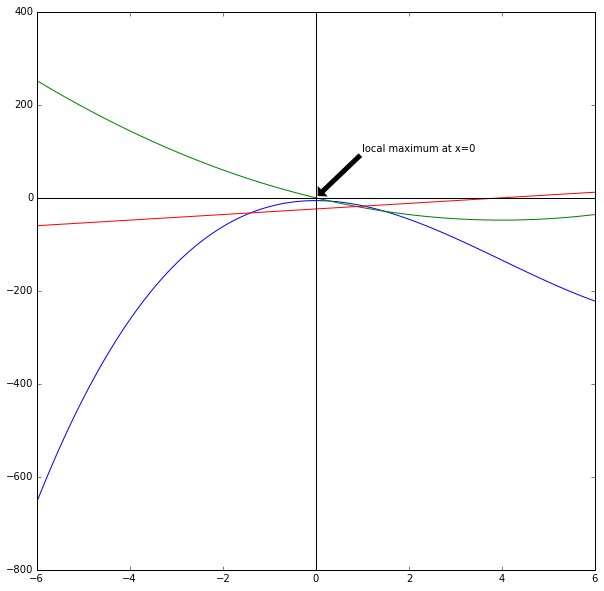

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from numpy import power, square, linspace

x = linspace(-6,6,100) # 100 linearly spaced numbers from -6 to +6
y = power(x,3)-(12*square(x))-6   # computing the values of x^3 - 12x^2 - 6
y_prime = 3*square(x)-24*x # first derivative 3x^2 - 24x
y_doubleprime = 6*x-24 # second derivative

# compose plot
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.plot(x,y_prime) # first derivative
plt.plot(x,y_doubleprime) # second derivative

# plot x,y axes for reference
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.annotate('local maximum at x=0', xy=(0, 0), xytext=(1, 100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show() # show the plot

#### For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?


The FOC for multivariate is where the gradient $\nabla = 0$: $\nabla f(x) = (0,0,...,0)$ where $\nabla f(x) = \bigg(\frac{\partial f}{\partial x_1},\frac{\partial f}{\partial x_2},...,\frac{\partial f}{\partial x_n} \bigg)$

The SOC for a local maxmimum is when the Hessian evaluated at that point is negative definite. The Hessian is given by: 

$$
\begin{equation*}
\mathbf{H} = 
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & ... & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_{2}^2} & ... & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & ... & \frac{\partial^2 f}{\partial x_{n}^2} \end{bmatrix}
\end{equation*}
$$

## HW6.2

Taking $x=1$ as the first approximation(xt1) of a root of $x^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)

In [3]:
# equation f(x) = x^3 + 2x - 4
def f(x):
    return x**3+2*x-4

# first derivative of equation f'(x) = 3x^2 + 2
def df(x):
    return 3*x**2+2

# computing where the tangent line at x = 0
def dx(f, x):
    return abs(0-f(x))

# starting with x0 as the first guess, iterate 
# do this only one iteration to get the second estimate
def newtons_method(f, df, x0, e):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
        break
    print 'Next approximation is at: ', x0
    
newtons_method(f, df, 1.0, 0.000001)

Next approximation is at:  1.2


## HW6.3 Convex optimization 

What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

An optimization problem is convex if its objective function $f_{0}(x)$ is convex, the inequality constraints $f_j(x) \leq 0$ are convex and the quality constraints $h_j = 0$ are affine.

The first order necessary conditions for optimality in convex optimization is

$$f(x) \geq f(y) + \nabla f(y)^T(x-y)$$

The function is globally above the tangent at y.

The second order optimality condititions for convex optimization is:

$$\nabla^2f(x) \geq 0$$

The function is flat or curved upwards in every direction.


Both FOC and SOC are not necessary to determine a maximum or minimum candidate optimal solutions.

Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing **convex** functions over **convex** sets. The **convex** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.

## HW 6.4

The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

$$\frac{1}{2} \sum_{i=1}^{n} w_i (WX_i - y_i)^2$$

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.

For Weighted Least Squares, we have the optimization function

$$f(\mathbf{W}) = \frac{1}{2} \sum_{i=1}w_i(\mathbf{W}X_i - y_i)^2$$

where $w_i$ are the weights for the objective function and $\mathbf{W}$ are the regression coefficients

Expanding this function and collecting terms we can write:

$$f(\mathbf{W}) = \frac{1}{2} \sum_{i=1}w_i(\mathbf{W}^{2}X_{i}^{2} - 2 \mathbf{W}X_{i}y_{i} + y{i}^{2})$$

The gradient $\nabla{f(\mathbf{W})}$ is the derivative of $f(\mathbf{W})$ 

$$\nabla{f(\mathbf{W})} = \frac{\partial f(\mathbf{W})}{\partial \mathbf{W}} = \sum_{i}2 \mathbf{W}X_{i}^{2}-2X_{i}y_{i}$$

$$\nabla{f(\mathbf{W})} = 2 \sum_{i}(\mathbf{W}X_{i}-y_{i})X_{i}$$

## HW 6.5

Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent.

Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

weight(x)= abs(1/x)

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

In [4]:
# generate 10^6 data points and save to disk
import numpy as np
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [5]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from mrjob.job import MRJob, MRStep

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_LinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(',')))
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1]
        # Update partial gradient vector with gradient form current example
        self.partial_Gradient =  [self.partial_Gradient[0] + D[0]-y_hat,
                                  self.partial_Gradient[1]+ (D[0]-y_hat) *D[1]]
        self.partial_count = self.partial_count + 1
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [MRStep(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_LinearRegression.py


In [6]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv',
                                                   '--file', 'weights.txt',
                                                   '--strict-protocols'])
# Update centroids iteratively
i = 0
while(1):
    print 'iteration: {0:4d} weights: {1:3.10f} {2:3.10f}'.format(i, weights[0], weights[1])
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print 'Final weights: {0:3.10f} {1:3.10f}'.format(weights[0], weights[1])

iteration:    0 weights: -0.3782666163 0.7160693989
iteration:    1 weights: -0.5593032907 0.7916999270
iteration:    2 weights: -0.7312893249 0.8471789177
iteration:    3 weights: -0.8946769330 0.8878763088
iteration:    4 weights: -1.0498958030 0.9177310378
iteration:    5 weights: -1.1973542006 0.9396323816
iteration:    6 weights: -1.3374400240 0.9556996750
iteration:    7 weights: -1.4705218097 0.9674874878
iteration:    8 weights: -1.5969496922 0.9761361267
iteration:    9 weights: -1.7170563171 0.9824820290
iteration:   10 weights: -1.8311577109 0.9871387396
iteration:   11 weights: -1.9395541085 0.9905563078
iteration:   12 weights: -2.0425307401 0.9930648563
iteration:   13 weights: -2.1403585797 0.9949065396
iteration:   14 weights: -2.2332950564 0.9962589859
iteration:   15 weights: -2.3215847307 0.9972524924
iteration:   16 weights: -2.4054599369 0.9979826378
iteration:   17 weights: -2.4851413943 0.9985195341
iteration:   18 weights: -2.5608387873 0.9989146131
iteration:  

In [4]:
# construct a linear model with scikit learn
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import random
from numpy import loadtxt, hsplit, asarray

def mr_predict(X, coefs):
    y = []
    for x in X:
        y.append(coefs[0] + x * coefs[1])
    return asarray(y)

def actual(X):
    y = []
    for x in X:
        y.append(x - 4.0)
    return asarray(y)

# read the original generated data set
data = loadtxt('LinearRegression.csv', delimiter = ",")

# generate a 1% random sample from the data set
random_sample = [ data[i] for i in sorted(random.sample(xrange(len(data)), len(data)/100)) ]

# split the data into an X array and Y array
train_data = hsplit(asarray(data),2)

# create a sample weight vector weight(x) = 1/abs(x)
w = [abs(1.0/x) for y,x in random_sample]

# create an instance of the scikit linear regression and train it
lr = LinearRegression()
model = lr.fit(train_data[1], train_data[0], w)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: The n_jobs parameter in fit is deprecated and will be removed in 0.17. It has been moved from the fit method to the LinearRegression class constructor.


In [ ]:
# plot the results
plt.figure(figsize=(10,10))
plt.plot(train_data[1], model.predict(train_data[1]), linewidth = 5.0, c='w')

plt.plot(train_data[1], mr_predict(train_data[1], weights), linewidth = 4.0,c='r')

plt.plot(train_data[1], actual(train_data[1]), linewidth = 2.0, c='g')
plt.scatter(train_data[1], train_data[0], c='black')

plt.show()

## HW6.5.1 (Optional)

Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.

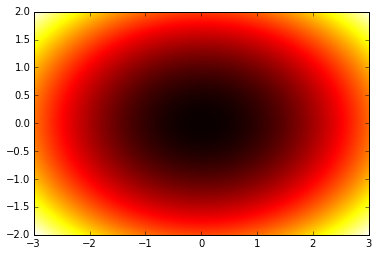

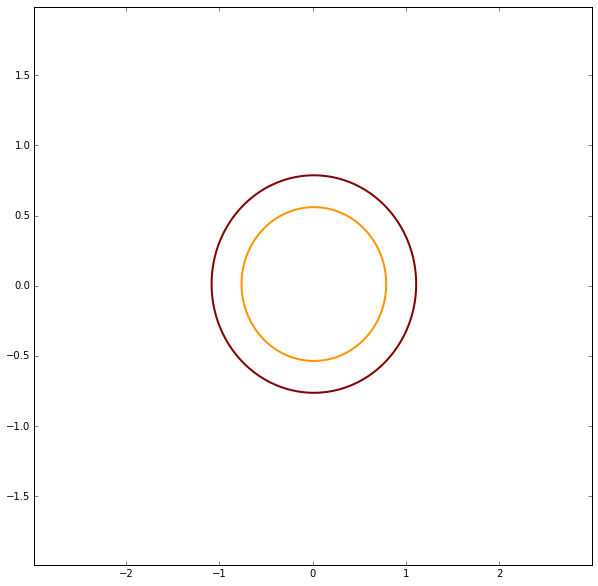

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numpy import power, square

x = np.linspace(-3,3,30) 
y = x
z = np.square(x)+(2*np.square(y))

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.square(X)+(2*np.square(Y))
# compose plot

im = plt.imshow(Z, interpolation='bilinear', origin='lower', cmap=cm.hot, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.6)
plt.figure(figsize=(10,10))
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

plt.show() # show the plot

## HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
-- Add in equations into the notebook (not images of equations) 
-- Number the equations
-- Make sure the equation notation matches the code and the code and comments refer to the equations numbers
-- Comment the code
-- Rename/Reorganize the code to make it more readable
-- Rerun the examples similar graphics (or possibly better graphics)

### Introduction

This is a map-reduce version of expectation maximization algorithm for a mixture of Gaussians model. There are two mrJob MR packages, mr_GMixEmIterate and mr_GMixEmInitialize. The driver calls the mrJob packages and manages the iteration.

#### E Step

Given priors $\pi_k$, mean vector $\boldsymbol \mu$ and covariance matrix $\boldsymbol \Sigma$: calculate the probablility that each of the data points belongs to a class $k$:

$$\tag{1} p(\omega_{k}\;\big|\;\mathbf{x}^{(i)},\theta) = \frac{\pi_{k}\mathcal{N}(\mathbf{x}^{(i)} \; \big | \; \boldsymbol{\mu}_{k}, \boldsymbol{\Sigma}_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(\mathbf{x}^{(i)} \;\big | \; \boldsymbol{\mu}_{j}, \boldsymbol{\Sigma}_j}$$


#### M Step

Given probabilities: update priors, mean and covariance

$$\tag{2} \boldsymbol{\hat \mu}_{k} = \frac{1}{n_{k}} \sum_{i=1}^{n} p(\omega_{k} \; \big |n \; \mathbf{x}^{(i)}, \theta) \mathbf{x}^{(i)}$$

$$\tag{3} \boldsymbol{\hat \Sigma}_{k} = \frac{1}{n_{k}} \sum_{i=1}^{n} p(\omega_{k} \; \big | \; \mathbf{x}^{(i)}, \theta)(\mathbf{x}^{(i)} - \boldsymbol{\hat \mu}_{k})(\mathbf{x}^{(i)} - \boldsymbol{\hat \mu}_{k})^{T}$$

$$\tag{4} \hat \pi_{k} = \frac{n_{k}}{n}\;\text{where}\; n_{k} = \sum_{i=1}^{n} p(\omega_{k} \; \big |\; \mathbf{x}^{(i)}, \theta)$$


We can compute the Guassian probability as:

$$\tag{5} p(x; \boldsymbol \mu, \boldsymbol \Sigma) = \frac{1}{(2\pi)^{n/2}|\boldsymbol \Sigma|^{1/2}}e^{\left(\frac{1}{2}(x- \boldsymbol \mu)^{T} \boldsymbol \Sigma^{-1}(x- \boldsymbol \mu) \right)}$$

### Data Generation

In [31]:
%matplotlib inline
from numpy import random, append
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import json

# generate 3 clusters the size of 1000 points each 
size1 = size2 = size3 = 1000

# cluster 1 is centered about (4,0)
samples1 = random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1

# cluster 2 is centered about (6,6)
samples2 = random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = append(data,samples2, axis=0)

# cluster 3 is centered about (0,4)
samples3 = random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = append(data,samples3, axis=0)

# we've appended all the generated data for the three clusters into a single list
# now randomize the list - shaken, not stirred. Save the result to a JSON file.
data = data[random.permutation(size1+size2+size3),]
with open("data.txt", "w") as f:
    for row in data.tolist():
        json.dump(row, f)
        f.write("\n")

### Data Visualization

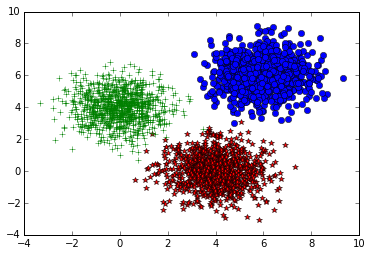

In [32]:
plt.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
plt.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
plt.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
plt.show()

### Initialization

If we didn't already know, from the visualization we conclude there are 3 clusters, so we'll set k = 3.

In [33]:
%%writefile mr_GMixEmInitialize.py
from mrjob.job import MRJob, MRStep

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from numpy import mean as npmean
from random import sample
import json
from math import pi, sqrt, exp, pow


class MrGMixEmInit(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGMixEmInit, self).__init__(*args, **kwargs)
        
        self.numMappers = 1     #number of mappers
        self.count = 0
                                                         
    def configure_options(self):
        super(MrGMixEmInit, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt is stored')
    
    # each line is a data point of the cluster x_j
    # take the first 2*k lines and emit them; ignore the rest
    def mapper(self, key, xjIn):
        #something simple to grab random starting point
        #collect the first 2*k
        if self.count <= 2*self.options.k:
            self.count += 1
            yield (1,xjIn)        
    
    # every key is the same = 1, so we should have 2*k items show up at the reducer
    # all we want is to accumulate the points into a list from which we will draw k randomly
    # the yield just throws the first k*2 samples into the aether
    def reducer(self, key, xjIn):        
        #accumulate data points mapped to 0 from 1st mapper and pull out k of them as starting point
        initial_point_set = []
        for xj in xjIn:
            x = json.loads(xj)
            initial_point_set.append(x)
            yield 1, xj
        
        # take k random samples
        centroids = [ initial_point_set[i] for i in sample(xrange(len(initial_point_set)), self.options.k) ]
            
        # use the covariance of the selected centers as the starting guess for covariances
        # first, calculate mean of centers, the mu vector from Equation 2
        mean = npmean(centroids, axis=0)
        
        # then accumulate the deviations along the diagonal of a square matrix 
        # this is the initialization of the Sigma matrix from Equation 3
        cov = zeros((len(mean),len(mean)),dtype=float)
        for x in centroids:
            xmm = array(x) - mean
            for i in range(len(mean)):
                cov[i,i] = cov[i,i] + xmm[i]*xmm[i]
        
        # This implements the 1/n_k from Equation 3 and then inverts the matrix
        cov = cov/(float(self.options.k))
        covInv = linalg.inv(cov)
        
        cov_1 = [covInv.tolist()]*self.options.k
        
        # dump our initialization results to a file for debug inspection
        jDebug = json.dumps([centroids,mean.tolist(),cov.tolist(),covInv.tolist(),cov_1]) 
        with open(self.options.pathName + "debug.txt", 'w') as debugfile:
            debugfile.write(jDebug)
        
        #also need a starting guess at the pi's - prior probabilities - Equation 4
        #initialize them all with the same number - 1/k - equally probably for each cluster
        
        pi = zeros(self.options.k,dtype=float)
        
        for i in range(self.options.k):
            pi[i] = 1.0/float(self.options.k)
        
        #form output object
        outputList = [pi.tolist(), centroids, cov_1]
            
        jsonOut  = json.dumps(outputList)
        
        #write new parameters to file
        fullPath = self.options.pathName + 'intermediateResults.txt'
        fileOut = open(fullPath,'w')
        fileOut.write(jsonOut)
        fileOut.close()

def steps(self):
    return [MRStep(mapper=self.mapper,
                   reducer=self.reducer)]
        
if __name__ == '__main__':
    MrGMixEmInit.run()

Overwriting mr_GMixEmInitialize.py


### Iteration

**Mapper** - each mapper needs k vector means and covariance matrices to make probability calculations. Can also accumulate partial sum (sum restricted to the mapper's input) of quantities required for update. Then it emits partial sum as single output from combiner.

Emit (dummy_key, partial_sum_for_all_k's)

**Reducer** –the iterator pulls in the partial sum for all k's from all the mappers and combines in a single reducer. In this case the reducer emits a single (json'd python object) with the new means and covariances.

In [34]:
%%writefile mr_GMixEmIterate.py
from mrjob.job import MRJob

from math import sqrt, exp, pow,pi
from numpy import zeros, shape, random, array, zeros_like, dot, linalg
import json

# compute the guassian probability for a point x as in Equation 5
def gauss(x, mu, P_1):
    xtemp = x - mu
    n = len(x)
    p = exp(- 0.5*dot(xtemp,dot(P_1,xtemp)))
    detP = 1/linalg.det(P_1)
    p = p/(pow(2.0*pi,n/2.0)*sqrt(detP))
    return p

class MrGMixEm(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGMixEm, self).__init__(*args, **kwargs)
        
        with open(self.options.pathName + 'intermediateResults.txt', 'r') as fileIn:
            inputJson = fileIn.read()

        inputList = json.loads(inputJson)
        self.phi =   inputList[0]  # prior class probabilities (Eqn. 3)
        self.means = inputList[1]  # means (Eqn. 2)
        self.cov_1 = inputList[2]  # inverse covariance matrices used for Eqn. 4
                            
        #sum of weights - by cluster
        self.new_phi = zeros_like(self.phi)        #partial weighted sum of weights
        self.new_means = zeros_like(self.means)
        self.new_cov = zeros_like(self.cov_1)
        
        self.numMappers = 1             #number of mappers
        self.count = 0                  #passes through mapper
        
                                                 
    def configure_options(self):
        super(MrGMixEm, self).configure_options()

        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt is stored')
    
    # each item is a point in the set of data points
    def mapper(self, _, val):
        #accumulate partial sums for each mapper
        xList = json.loads(val)
        x = array(xList)
        wtVect = zeros_like(self.phi)
        
        # for each cluster compute the weights from the guassian probabilities for this point
        # as shown in Equation 4
        for i in range(self.options.k):
            wtVect[i] = self.phi[i]*gauss(x,self.means[i],self.cov_1[i])
        wtSum = sum(wtVect)
        wtVect = wtVect/wtSum
        #accumulate to update est of probability densities.
        #increment count
        self.count += 1
        #accumulate weights for phi est
        self.new_phi = self.new_phi + wtVect
        for i in range(self.options.k):
            #accumulate weighted x's for mean calc
            self.new_means[i] = self.new_means[i] + wtVect[i]*x
            #accumulate weighted squares for cov estimate
            xmm = x - self.means[i]
            covInc = zeros_like(self.new_cov[i])
            
            for l in range(len(xmm)):
                for m in range(len(xmm)):
                    covInc[l][m] = xmm[l]*xmm[m]
            self.new_cov[i] = self.new_cov[i] + wtVect[i]*covInc     
        #dummy yield - real output passes to mapper_final in self

        
    def mapper_final(self):
        
        out = [self.count, (self.new_phi).tolist(), (self.new_means).tolist(), (self.new_cov).tolist()]
        jOut = json.dumps(out)        
        
        yield 1,jOut
    
    
    def reducer(self, key, xs):
        #accumulate partial sums
        first = True        
        #accumulate partial sums
        #xs us a list of paritial stats, including count, phi, mean, and covariance. 
        #Each stats is k-length array, storing info for k components
        for val in xs:
            if first:
                temp = json.loads(val)
                #totCount, totPhi, totMeans, and totCov are all arrays
                totCount = temp[0]
                totPhi = array(temp[1])
                totMeans = array(temp[2])
                totCov = array(temp[3])                
                first = False
            else:
                temp = json.loads(val)
                #cumulative sum of four arrays
                totCount = totCount + temp[0]
                totPhi = totPhi + array(temp[1])
                totMeans = totMeans + array(temp[2])
                totCov = totCov + array(temp[3])
        #finish calculation of new probability parameters. array divided by array
        newPhi = totPhi/totCount
        #initialize these to something handy to get the right size arrays
        newMeans = totMeans
        newCov_1 = totCov
        for i in range(self.options.k):
            newMeans[i,:] = totMeans[i,:]/totPhi[i]
            tempCov = totCov[i,:,:]/totPhi[i]
            #almost done.  just need to invert the cov matrix.  invert here to save doing a matrix inversion
            #with every input data point.
            newCov_1[i,:,:] = linalg.inv(tempCov)
        
        outputList = [newPhi.tolist(), newMeans.tolist(), newCov_1.tolist()]
        jsonOut = json.dumps(outputList)
        
        #write new parameters to file
        with open(self.options.pathName + 'intermediateResults.txt','w') as fileOut:
            fileOut.write(jsonOut)

if __name__ == '__main__':
    MrGMixEm.run()

Overwriting mr_GMixEmIterate.py


### Driver

Iteration0
[[-0.9888830377827774, 3.5024720410779446], [5.632531279247575, 5.639369810591645], [5.075913188878569, 4.220503792169227]]


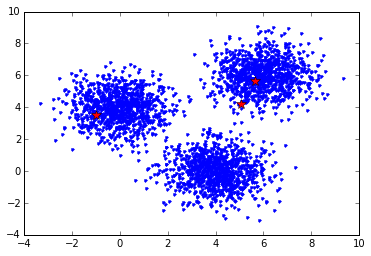

Iteration1
[[2.1134726192285447, 1.5984239730818919], [5.222596281352015, 6.152235142254203], [3.445601287149526, 3.6438840919083004]]


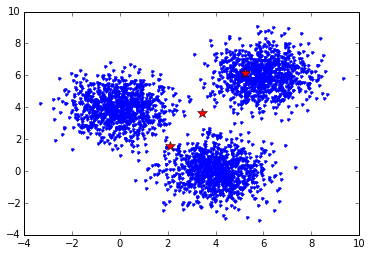

Iteration2
[[2.131596475369682, 1.661140557555178], [5.4837768644688385, 6.049774821653279], [2.910295021840567, 3.7601323152738266]]


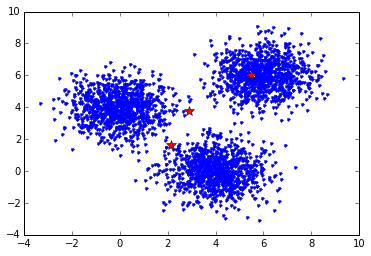

Iteration3
[[2.083253366788591, 1.7677842578288032], [5.785236540853202, 6.072051510371967], [2.6098113769859705, 3.800229802771744]]


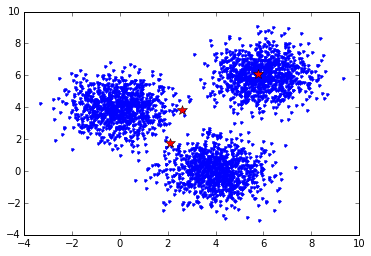

Iteration4
[[2.0675741991606476, 1.8259298892325253], [5.939818996154481, 6.087072107579678], [2.2711420860537626, 3.777028136097353]]


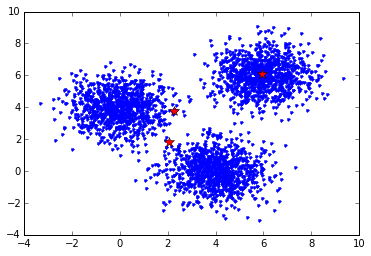

Iteration5
[[2.070488688634239, 1.843955946566191], [5.968825428781317, 6.083479494842308], [1.9670284650977687, 3.770791187955294]]


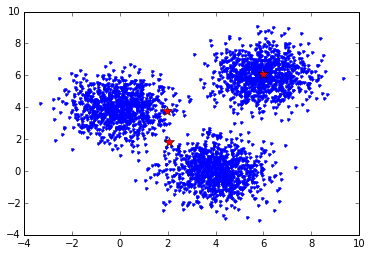

Iteration6
[[2.078349939360448, 1.846450505677145], [5.970849287961664, 6.076809575640579], [1.67219677025096, 3.8066599126057308]]


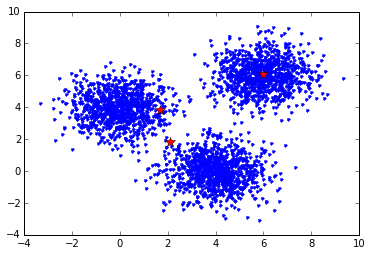

Iteration7
[[2.0914902525132035, 1.8401548826022853], [5.96764360650507, 6.070057580615657], [1.3485665363784753, 3.8801736210234155]]


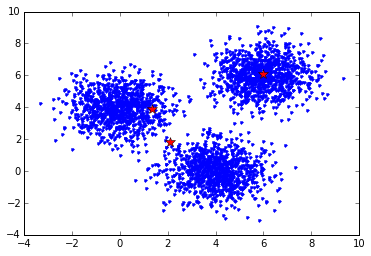

Iteration8
[[2.112773501397907, 1.825210733070598], [5.963895525249326, 6.063678183547147], [0.9889553422116729, 3.989698222521716]]


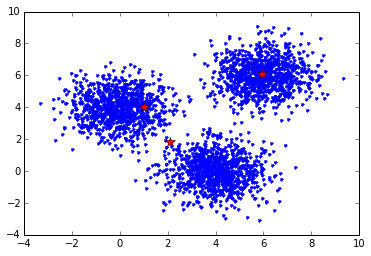

Iteration9
[[2.14735878252047, 1.7975726630999755], [5.960626813537449, 6.057361247156723], [0.5993309768504114, 4.119984527444593]]


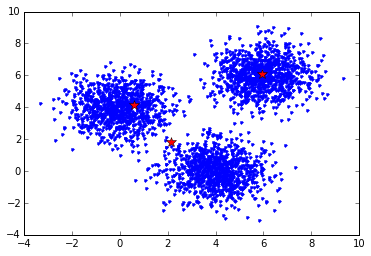

Iteration10
[[2.205510792193527, 1.7458071884196904], [5.957383931336121, 6.050174075392001], [0.22671612653934622, 4.228041979744838]]


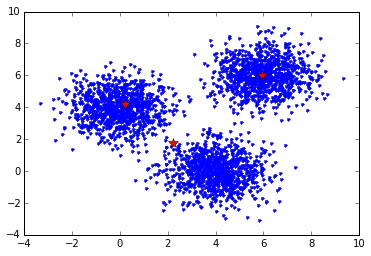

Iteration11
[[2.3083159323802636, 1.6437744891035384], [5.951885837953377, 6.04255126121449], [-0.014567079636599008, 4.259462181090834]]


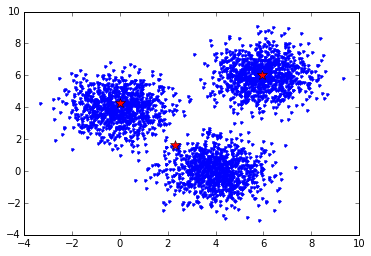

Iteration12
[[2.4735498717000888, 1.4783817464263793], [5.945961540159406, 6.0387412836675125], [-0.12030991620243672, 4.2465128947898645]]


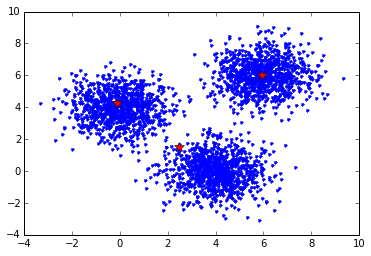

Iteration13
[[2.6688437443708484, 1.2876839441073875], [5.943841179322851, 6.037861790822221], [-0.163638545665176, 4.2293281819005015]]


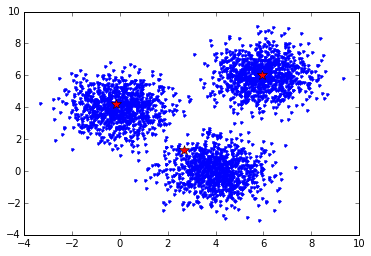

Iteration14
[[2.854789193084156, 1.1083590745481107], [5.943280585268021, 6.03776550739148], [-0.18397010317963458, 4.215344328255406]]


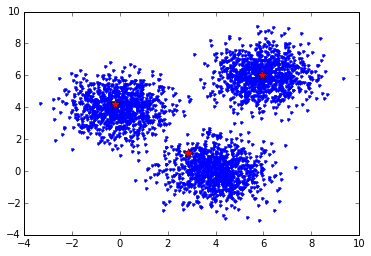

Iteration15
[[3.0282376070585277, 0.9416281734925245], [5.9430514696090695, 6.037791114222845], [-0.1956802250357914, 4.205194022858775]]


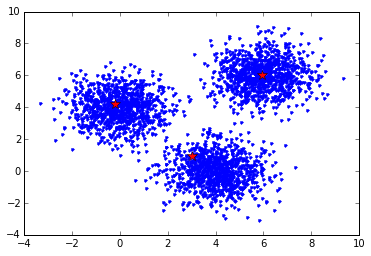

Iteration16
[[3.2032230424231827, 0.7732844351437782], [5.942869162241926, 6.037787721822767], [-0.2021925573106376, 4.19598643721064]]


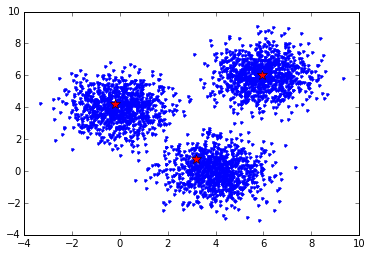

Iteration17
[[3.390262824645587, 0.5929055472428831], [5.942654666393197, 6.037739440968037], [-0.2002006741731183, 4.181988342004799]]


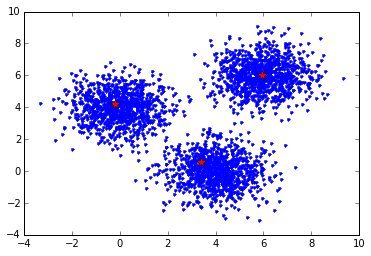

Iteration18
[[3.5840599725961924, 0.40521443878529934], [5.942328843446679, 6.037618475394503], [-0.18031892271025274, 4.1535538815881345]]


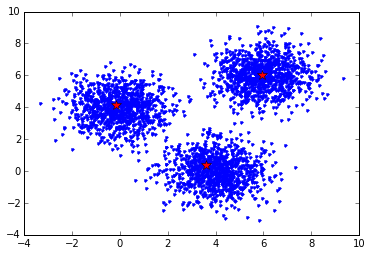

Iteration19
[[3.76219322155042, 0.2318737588833673], [5.941797441200421, 6.037326560381442], [-0.13974667084368111, 4.107533898412953]]


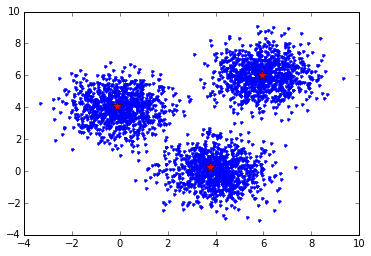

Iteration20
[[3.897401755241948, 0.1004307908297767], [5.941236119821501, 6.036838372536276], [-0.09395925422676217, 4.057884392126545]]


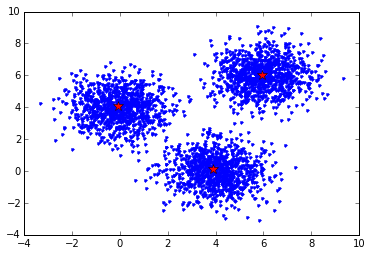

Iteration21
[[3.969042488719904, 0.03303265051351519], [5.94104457470251, 6.036325607513039], [-0.06328446233358243, 4.0229130434661995]]


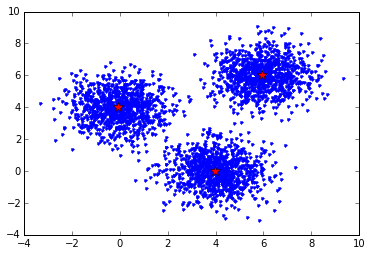

Iteration22
[[3.9908720565250375, 0.014350690359509782], [5.941045829858317, 6.035931826167468], [-0.0523985139712314, 4.008726451036319]]


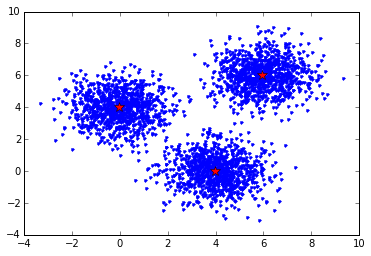

Iteration23
[[3.9955784865857953, 0.010696308006288914], [5.94104856140416, 6.035796925690169], [-0.049614568570987116, 4.0048343853125505]]


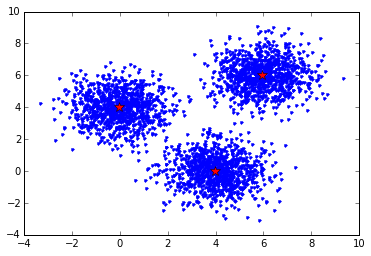

In [35]:
from mr_GMixEmInitialize import MrGMixEmInit
from mr_GMixEmIterate import MrGMixEm
import json
from math import sqrt
import matplotlib.pyplot as plt

def plot_iteration(means):
    plt.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    plt.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    plt.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    plt.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    plt.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    plt.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    plt.show()

def dist(x,y):
    #euclidean distance between two lists    
    sum = 0.0
    for i in range(len(x)):
        temp = x[i] - y[i]
        sum += temp * temp
    return sqrt(sum)

# first run the initializer to get starting centroids
filePath = 'data.txt'
mrJob = MrGMixEmInit(args=[filePath,
                           '--k','3',
                           '--pathName','/Users/rcordell/Documents/MIDS/W261/week06/HW6/',
                           '--strict-protocols'])

# after running this MRJob we will have an initialized mu, sigma, and priors (pi's)
# as indicated in Equations 2, 3 and 4
with mrJob.make_runner() as runner:
    runner.run()

# pull out the centroid values to compare with values after one iteration
emPath = "/Users/rcordell/Documents/MIDS/W261/week06/HW6/intermediateResults.txt"
with open(emPath, "r") as fileIn:
    paramJson = fileIn.read()    

delta = 10
iter_num = 0
#Begin iteration on change in centroids
while delta > 0.02:
    print "Iteration" + str(iter_num)
    iter_num = iter_num + 1
    # parse old centroid values
    oldParam = json.loads(paramJson)
    # run one iteration
    oldMeans = oldParam[1]
    mrJob2 = MrGMixEm(args=[filePath,
                           '--k','3',
                           '--pathName','/Users/rcordell/Documents/MIDS/W261/week06/HW6/',
                           '--strict-protocols'])
    with mrJob2.make_runner() as runner:
        runner.run()

    #compare new centroids to old ones
    with open(emPath, 'r') as fileIn:
        paramJson = fileIn.read()
        
    newParam = json.loads(paramJson)

    k_means = len(newParam[1])
    newMeans = newParam[1]

    delta = 0.0
    for i in range(k_means):
        delta += dist(newMeans[i],oldMeans[i])

    print oldMeans
    plot_iteration(oldMeans)
print "Iteration" + str(iter_num)
print newMeans
plot_iteration(newMeans)

## HW6.7 Implement Bernoulli Mixture Model via EM

Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

As a unit test:


As a test: use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using K = 4.  Repeat this experiment using your KMeans MRJob implementation fron HW4.
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:

0: Human, where only basic human-human communication is observed.

1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

http://arxiv.org/abs/1505.04342
http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.

### IR Book 16.3 Concept Code

This code implements the Bernoulli EM algorithm as described in the IR Book, example 16.3. This exercise is useful to ensure an understanding of the algorithm and to check functionality. There are a few bits that aren't explained will in the book but become apparent when working with this code. 

- During the computation of the $r_{n,k}$ classifications it is best to use log(probabilities) in order to prevent underflow

- The use of $\epsilon$ as a smoothing parameter is crucial to the good behavior of the algorithm and to avoid either a divide by zero or a log(0) problem. In the IR book $\epsilon$ is set to 0.0001. Setting to smaller values causes the algorithm to take more iterations to converge to the same solution as in the book.

In a Bernoulli Mixture Model a document is a vector of Booleans indicating the presence of a term.

The conditional probability of a document given a set of parameters is given by:

$$P(d \;|\;\theta) = \sum_{k=1}^{K}\alpha_k(\prod_{tm \in d} q_{mk})(\prod_{tm \notin d}(1 - q_{mk}))$$

This is the sum for each class of the product of the probabilities of the terms in a document with 1 minus the probabilities of the terms not in the document.

The probability that a document from cluster $\omega_{k}$ containts term $t_{m}$ is given by:

$$q_{mk} = P(U_{m} = 1 \; | \;\omega_{k})$$

The prior $\alpha_{k}$ of cluster $\omega_{k}$ is the probability document $d$ is in $\omega_{k}$ if we have no other information about it.

When we don't know the classifications of the documents we can use Expectation Maximization iteratively to arrive at classifications, $r_{nk}$.

**E Step**

$$\tag{1} r_{nk} = \frac{\alpha_{k}(\prod_{tm \in d_n}q_{mk})(\prod_{tm \in d_n}1-q_{mk})}{\sum_{k=1}^{K}\alpha_{k}(\prod_{tm \in d_n}q_{mk})(\prod_{tm \in d_n}1-q_{mk})}$$

The actual computation as implemented by taking the sum of the log probabilities as opposed to the products of the probabilities themselves. This is necessary because once you are dealing with many terms, multiplying a lot of small numbers results in numeric underflow. Also, in order to prevent taking the log(0), which will happen in the first iteration, a very small number, $\delta$, is added to the probability before taking the log. So we end up with:

$$\tag{1a} r_{nk} = \frac{\alpha_{k}e^{\left(\sum_{tm \in d_n}log(q_{mk}+\delta) + \sum_{tm \notin d_n}log(1-q_{mk}+\delta) \right)}}{\sum_{k}\alpha_{k} e^{\left(\sum_{tm \in d_n} \left(log(q_{mk}+\delta) + \sum_{tm \notin d_n}log(1-q_{mk}+\delta) \right) \right)}}$$

In the code below, a single pass is made to calculate the $r$ class soft assignments so that the terms are calculated only once so it may not be obvious what's going on.

_Note: the $\delta$ values are important for the algorithm to get past the first iteration. If you take a straight calculation of the $r_{1,1}$ term in the first iteration you will end up with a divide by zero using the original equations. By including the $\epsilon$ term this is avoided and you'll see that the result is very close to 1_

**M Step**

With smoothing $\epsilon$ the M-Step equation becomes:

$$\tag{2} q_{mk} = \frac{\sum_{n=1}^{N}(r_{nk}+\epsilon)I(t_m \in d_n)}{\sum_{i=1}^{N}(r_{nk}+\epsilon)}$$

$I(t_{m} \in d_{n}) = 1$ if term is an element of document n and 0 otherwise.

$\epsilon$ is the smoothing factor, set to 0.00001 as in example 16.3 in the IR book.

Finally, priors are updated per iteration as:

$$\tag{3} \alpha_k = \frac{\sum_{n=1}^{N}r_{nk}}{N}$$



In [36]:
# save this to a file - it will be handy for MR testing later
with open('test.txt','w') as outfile:
    outfile.write('hot chocolate cocoa beans\n')
    outfile.write('cocoa ghana africa\n')
    outfile.write('beans harvest ghana\n')
    outfile.write('cocoa butter\n')
    outfile.write('butter truffles\n')
    outfile.write('sweet chocolate\n')
    outfile.write('sweet sugar\n')
    outfile.write('sugar cane brazil\n')
    outfile.write('sweet sugar beet\n')
    outfile.write('sweet cake icing\n')
    outfile.write('cake black forest\n')

In [37]:
import re
from math import log
import numpy as np

# read the documents. Each document consists of a list of words.
documents = []
with open('test.txt', 'r') as docfile:
    for line in docfile.readlines():
        documents.append(re.split(' ', line.strip()))

classes = 2
r = [[None] * len(documents), [None] * len(documents)]

# set our initial conditions (r_6,1 = 1.0 and r_7,1 = 0.0 and the converse for the other class)
r[0][5] = r[1][6] = 1.0
r[0][6] = r[1][5] = 0.0

# initialize the priors
alpha = [0.0] * classes

# delta is to keep the arithmetic well behaved - it is not the smoothing factor
delta = 1.0E-12

# epsilon is for smoothing in Equation 2 and 3 (16.16 in the IR Book)
epsilon = 0.0001

# conditional term probabilities
qm = {}

# compute alphas - Equation 3
def compute_alphas(alphas):
    for k in range(classes):
        alphas[k] = sum([x for x in r[k] if x is not None])/len([x for x in r[k] if x is not None])


# compute inverted postings list
# this is handy for the computation of the qm's
def compute_postings():
    postings = {}
    for i in range(len(documents)):
        if r[0][i] is not None:
            for word in documents[i]:
                if word not in postings:
                    postings[word] = [i]
                else:
                    if i not in postings[word]:
                        postings[word].append(i)
    return postings

# compute qm's - Equation 2
def compute_next_qms(qm):
    for k in range(classes):
        for i in range(len(r[k])):
            if r[k][i] is not None:
                for word in documents[i]:
                    # use smoothing value epsilon
                    if word not in qm:
                        qm[word] = {k: sum([r[k][j]+epsilon for j in postings[word]]) / \
                                    sum([x+epsilon for x in r[k] if x is not None])}
                    else:
                        qm[word][k] = sum([r[k][j]+epsilon for j in postings[word]]) / \
                                    sum([x+epsilon for x in r[k] if x is not None])
    

# compute next iteration of r's - Equation 1a
# note - need to do log(probability)
def compute_next_r(rs):
    for i in range(len(documents)):
        vocab_words_in_doc = []
        p = np.zeros((classes, 2))
        
        # find all vocab words in the doc. Note: there may be none.
        for word in documents[i]:
            if word in qm:
                vocab_words_in_doc.append(word)
                for k in range(classes):
                    # prevent math errors by not taking log(0)
                    p[k][0] += np.log(qm[word][k] + delta)
        if len(vocab_words_in_doc) > 0:
            # find all vocab words not in doc for all classes at the same time
            for word in qm:
                if word not in vocab_words_in_doc:
                    for k in range(classes):
                        # prevent math errors by not taking log(0)
                        p[k][1] += np.log(1-qm[word][k] + delta)                        
            # compute the denominator of Equation 1a for all classes
            denom = 0.0
            for k in range(classes):
                denom += alpha[k]*np.exp(p[k][0]+p[k][1])
                
            # compute the new r of Equation 1a for all classes
            for k in range(classes):
                rs[k][i] = alpha[k]*np.exp(p[k][0]+p[k][1])/denom

        else:
            # set to prior in case of no information
            for k in range(classes):
                rs[k][i] = alpha[k]

# iterate
for _ in range(25):
    compute_alphas(alpha)
    postings = compute_postings()
    compute_next_qms(qm)
    compute_next_r(r)

In [38]:
# if you take out rounding you can see that these values are not exact
print 'Soft classifications\n',np.around(r, 2)
print '\nPriors (alpha)',np.around(alpha,2)

Soft classifications
[[ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]]

Priors (alpha) [ 0.45  0.55]


### Bernoulli Mixture Model MapReduce Implementation

- Initialize the classification matrix and the priors

- Implement the EM algorithm as MapReduce iterations

The first stage MR creates the data structures and initializes them. The first data structure is the soft classification, $r_{n,k}$. This is represented by r and has an entry per document and per class. The entry for the document is a list of indexes of the word count positions that have a value > 0 in the input file. The second data structure is the postings of which terms are in which document. The postings are nice to have when computing the iterations. The postings are computed using map reduce, the r document structure is built as a dictionary of lists where the doc id is the key.

In [88]:
%%writefile MRJob_BernoulliMixtureInit.py
from mrjob.job import MRJob, MRStep
import json
import re

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MRJob_BernoulliMixtureInit(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MRJob_BernoulliMixtureInit, self).__init__(*args, **kwargs)
        
        self.count = 0
                                                         
    def configure_options(self):
        super(MRJob_BernoulliMixtureInit, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt is stored')

    # mapper init creates the initial r_n,k store
    def map_postings_init(self):
        self.r = {}

    # mapper to read a line from document file and emit binary postings data
    # we don't care about term frequencies because this is bernoulli, so 
    # if a word count is > 0 emit True otherwise False
    def map_postings(self, _, line):
        value_list = re.split(',', line.strip())
        doc = value_list[0]
        # add entry to the r dictionary for this document
        # initialize soft assignments to 1/k
        
        r_class = [1.0/float(self.options.k)]*4
        self.r[doc] = {'class' : r_class}
        self.r[doc]['term_idx'] = []
        
        # words appear starting in position 3 (from 0)
        for i in range(3,len(value_list)):
            # emit the position(word), id(doc) as key, value
            if int(value_list[i]) > 0:
                # if this term count > 0 then add term position to doc index
                self.r[doc]['term_idx'].append(i-3)
                yield i-3, int(value_list[0])
                
    def map_postings_final(self):
        with open(self.options.pathName+'r.txt','w') as r_file:
            for doc in self.r:
                priors = '\t'.join(str(x) for x in self.r[doc]['class'])
                r_file.write('{0}\t{1}\n'.format(doc, priors))
        
        # write out a different format of the documents that makes it a
        # bit easier to perform the EM computations
        with open(self.options.pathName+'document_vectors.txt','w') as vec_file:
            for doc in self.r:
                terms  = '\t'.join(str(x) for x in self.r[doc]['term_idx'])
                vec_file.write('{0}\t{1}\n'.format(doc, terms))
                        
    # postings reducer initialization of the postings dictionary
    def reduce_postings_init(self):
        self.postings = {}
    
    # reduce postings list
    def reduce_postings(self, term_idx, docs):
        if term_idx not in self.postings:
            self.postings[term_idx] = []
        for doc in docs:
            if doc not in self.postings[term_idx]:
                self.postings[term_idx].append(doc)

    # reducer final is to write the postings list to disk
    def reduce_postings_final(self):
        with open(self.options.pathName+'postings.txt','w') as postings_file:
            for word in self.postings:
                p = '\t'.join([str(x) for x in self.postings[word]])
                postings_file.write('{0}\t{1}\n'.format(word,p))
    
    def steps(self):
        return [MRStep(mapper_init=self.map_postings_init,
                       mapper=self.map_postings,
                       mapper_final=self.map_postings_final,
                       reducer_init=self.reduce_postings_init,
                       reducer=self.reduce_postings,
                       reducer_final=self.reduce_postings_final,
                       jobconf = {
                        'mapred.map.tasks' : 1,
                        'mapred.reduce.tasks' : 1
                    })]

    
if __name__ == '__main__':
    MRJob_BernoulliMixtureInit.run()

Overwriting MRJob_BernoulliMixtureInit.py


In [89]:
!python MRJob_BernoulliMixtureInit.py --pathName '/Users/rcordell/Documents/MIDS/W261/week06/HW6/' \
  --strict-protocols \
  --quiet \
  --k 4 \
  -r local 'topUsers_test.txt' 

This MR code is where the EM calculations are made and the intermediate results saved to disk.

In [193]:
%%writefile MRJob_BernoulliMixtureModelQM.py
from mrjob.job import MRJob, MRStep
import json
import re

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MRJob_BernoulliMixtureModelQM(MRJob):
    DEFAULT_PROTOCOL = 'json'
                                                         
    def configure_options(self):
        super(MRJob_BernoulliMixtureModelQM, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt is stored')

    # load up the postings list
    def qm_mapper_init(self):
        self.postings = {}
        with open(self.options.pathName+'postings.txt','r') as postings_file:
            for line in postings_file.readlines():
                p = re.split('\t',line.strip())
                word = int(p[0].strip())
                if word not in self.postings:
                    self.postings[word] = []
                for doc in p[1:]:
                    self.postings[word].append(int(doc.strip()))
        # load the r_nk values            
        self.r = {}
        with open(self.options.pathName+'r.txt','r') as r_file:
            for line in r_file.readlines():
                vals = re.split('\t', line.strip())
                doc = int(vals[0].strip())
                self.r[doc] = [float(x.strip()) for x in vals[1:]]
    
    # examine the document term index and emit word, (r_nk, class)
    def qm_mapper(self, _, line):
        r_line = re.split('\t', line.strip())
        doc = int(r_line[0].strip())
        # word index vector
        words = [int(x.strip()) for x in r_line[1:]]
        for word in words:
            #the word should be in the postings list; this is
            #just defensive programming
            if word in self.postings:
                # emit all the document r_nk that have that word
                for document in self.postings[word]:
                    for k in range(len(self.r[document])):
                        yield (word,k), self.r[document][k]
                        
    def qm_mapper_final(self):
        alpha = [0.0]*4
        for k in range(self.options.k):
            for doc in self.r:
                alpha[k] += self.r[doc][k]
        with open(self.options.pathName+'alpha.txt','w') as alpha_file:
            for k in alpha:
                alpha_file.write('{0}\t'.format(k/len(self.r)))

        
                    
    # the driver should intercept the output and write the results to
    # the qm.txt file
    def qm_reduce(self, word_class, r_nk):
        yield (word_class), sum(r_nk)
       
    def steps(self):
        return [MRStep(mapper_init=self.qm_mapper_init,
                       mapper=self.qm_mapper,
                       mapper_final=self.qm_mapper_final,
                       reducer=self.qm_reduce,
                       jobconf = {
                            'stream.num.map.output.key.fields': 2,
                            'mapred.text.key.partitioner.options': '-k1n,2n',
                            'mapred.text.key.comparator.options': '-k2,2n'
                        }
                     )               
               ]

if __name__ == '__main__':
    MRJob_BernoulliMixtureModelQM.run()

Overwriting MRJob_BernoulliMixtureModelQM.py


In [ ]:
!python MRJob_BernoulliMixtureModelQM.py --pathName '/Users/rcordell/Documents/MIDS/W261/week06/HW6/' \
  --strict-protocols \
  --quiet \
  --k 4 \
  -r local 'document_vectors.txt' 

In [136]:
%%writefile MRJob_BernoulliMixtureModelRnk.py
from mrjob.job import MRJob, MRStep
import json
import re
import numpy as np

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MRJob_BernoulliMixtureModelRnk(MRJob):
    DEFAULT_PROTOCOL = 'json'

                                                         
    def configure_options(self):
        super(MRJob_BernoulliMixtureModelRnk, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults.txt is stored')

    
    # read in the qm and alpha values
    def rnk_mapper_init(self):
        self.qm = {}
        with open(self.options.pathName+'qm.txt','r') as qm_file:
            for line in qm_file.readlines():
                vals = re.split('\t',line.strip())
                self.qm[int(vals[0])]=[float(x.strip()) for x in vals[1:]]            
        self.delta = 1E-12
                
    # for this we want the document word vector file
    def rnk_mapper(self, _, line):
        r_line = re.split('\t', line.strip())
        doc = int(r_line[0].strip())
        words = [int(x.strip()) for x in r_line[1:]]
        for i in range(max(self.qm.keys())):
            if i in words:
                if i in self.qm:
                    for k in range(len(self.qm[i])):
                        yield (doc,k), (np.log(self.qm[i][k]+1E-12))
                else:
                    for k in range(len(self.qm[i])):
                        yield (doc,k), (np.log(1.0-self.qm[i][k]+1E-12))
       
    
    # the reducer outputs the sum of the log probabilities for each term for each document for each class
    def rnk_reducer(self, doc_class, score):
        yield doc_class, sum(score)
   
    # load up the alpha values in preparation to calculate the new classifications
    def mapper_init(self):
        self.alpha = []
        with open(self.options.pathName+'alpha.txt','r') as alpha_file:
            for line in alpha_file.readlines():
                self.alpha = [(float(x.strip())) for x in re.split('\t',line.strip())]
        self.r = {}
                
    def mapper(self, doc_class, log_prob):
        if doc_class[0] not in self.r:
            self.r[doc_class[0]] = []
        self.r[doc_class[0]].append(log_prob)
        
    def mapper_final(self):
        for doc in self.r:
            print doc, r[doc]


    def reducer(self, doc_class, log_prob):
        pass

        # now we have all the log probabilities for every class in every document
#        for doc in r:
#            a = [np.exp(x) for x in r[doc]]
#            denom = 0.0
#            for i in range(len(a)):
#                a[i] = self.alpha[i]*a[i]
#                denom += a[i]
#            for k in range(len(r[doc])):
#                r[doc][k] = a[k]/denom 
#                yield (doc,k), r[doc][k]

    def mapper_final(self):
        pass
                
    def steps(self):
        return [MRStep(mapper_init=self.rnk_mapper_init,
                       mapper=self.rnk_mapper,
                       reducer=self.rnk_reducer,
                       jobconf = {
                            'stream.num.map.output.key.fields': 2,
                            'mapred.text.key.partitioner.options': '-k1n,2n',
                            'mapred.text.key.comparator.options': '-k2,2n'
                        }),
                MRStep(mapper_init=self.mapper_init,
                       mapper=self.mapper,
                       mapper_final=self.mapper_final,
#                       reducer_init=self.reducer_init,
#                       reducer=self.reducer,
                       jobconf = {
                            'mapred.map.tasks' : 1,
                            'mapred.reduce.tasks' : 1
                            }
                    )
               ]

    
if __name__ == '__main__':
    MRJob_BernoulliMixtureModelRnk.run()

Overwriting MRJob_BernoulliMixtureModelRnk.py


In [137]:
!python MRJob_BernoulliMixtureModelRnk.py --pathName '/Users/rcordell/Documents/MIDS/W261/week06/HW6/' \
  --strict-protocols \
  --quiet \
  --k 4 \
  -r local 'document_vectors.txt' 

This is the driver for the MRJob steps that invokes the initialization MR job and then iteratively drives the EM MR job.

In [ ]:
from mrjob.job import MRJob
from MRJob_BernoulliMixtureInit import MRJob_BernoulliMixtureInit
from MRJob_BernoulliMixtureModelQM import MRJob_BernoulliMixtureModelQM
from MRJob_BernoulliMixtureModelRnk import MRJob_BernoulliMixtureModelRnk
import json

# need to make this an argument passed to the program
filePath = 'topUsers_test.txt'
doc_vectors = 'document_vectors.txt'
qm_file = 'qm.txt'
pathName = '/Users/rcordell/Documents/MIDS/W261/week06/HW6/'

# initialize documents and postings
mrJob = MRJob_BernoulliMixtureInit(args=[filePath,
                                       '--k','4',
                                       '--pathName',pathName,
                                       '--strict-protocols'])

# after running this MRJob we will have an initialized r_n,k and postings
with mrJob.make_runner() as runner:
    runner.run()

#Begin iteration on change in centroids
for iteration in range(1):
    print "Iteration" + str(iteration+1)

    # run one iteration
    mrJob_M = MRJob_BernoulliMixtureModelQM(args=[doc_vectors,
                                           '--k','4',
                                           '--pathName',pathName,
                                           '--strict-protocols'])
    with mrJob_M.make_runner() as runner:
        runner.run()
        qm = {}
        for line in runner.stream_output():
            key, value = mrJob_M.parse_output_line(line)
            if key[0] not in qm:
                qm[key[0]]=[]
            qm[key[0]].append(value)
        with open (pathName+qm_file,'w') as qmFile:
            for word in qm:
                qmFile.write('{0}\t{1}\n'.format(word, '\t'.join([str(x) for x in qm[word]])))
                    
    mrJob_E = MRJob_BernoulliMixtureModelQM(args=[doc_vectors,
                                           '--k','4',
                                           '--pathName',pathName,
                                           '--strict-protocols'])
    with mrJob2.make_runner() as runner:
        runner.run()

        



## HW6.8 (Optional) 1 Million songs
Predict the year of the song. Ask Jimi